In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#import essential libraries.

In [2]:
plane=pd.read_csv(r"C:\Users\singa tharun reddy\Desktop\Github projects\Airplane crash analysis\crash.csv")

In [3]:
# Description of columns given by the dataset author.

#Date: Date of accident, in the format - January 01, 2001
#Time: Local time, in 24 hr. format unless otherwise specified
#Airline/Op: Airline or operator of the aircraft
#Flight #: Flight number assigned by the aircraft operator
#Route: Complete or partial route flown prior to the accident
#AC Type: Aircraft type
#Reg: ICAO registration of the aircraft
#cn / ln: Construction or serial number / Line or fuselage number
#Aboard: Total aboard (passengers / crew)
#Fatalities: Total fatalities aboard (passengers / crew)
#Ground: Total killed on the ground
#Summary: Brief description of the accident and cause if known

In [4]:
plane.head()#exploring the dataset.

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [5]:
plane.shape#Explore number of columns and rows.

(4967, 17)

In [6]:
plane.info()#Explore datatypes of columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4193 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

In [7]:
plane['Date']=pd.to_datetime(plane['Date'], utc=False)#Converting Date column into date_time datatype.

In [8]:
plane.isna().sum()#Exploring number of null values.

Date                        0
Time                     1510
Location                    4
Operator                   10
Flight #                 3652
Route                     774
AC Type                    15
Registration              273
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     41
Summary                    64
dtype: int64

In [9]:
# around 70% of Flight column data has null values, we are dropping it.
plane.drop("Flight #",inplace=True,axis=1)

In [10]:
#Changing the column names according to description given by author for better understanding.
plane.rename(columns = {'AC Type':'Aircraft_type'}, inplace = True) 

In [11]:
#Keeping the analysis simple, dropping redundant columns and that have more null values.
plane.drop(["Time","Registration","cn/ln","Aboard Passangers","Aboard Crew","Fatalities Passangers","Fatalities Crew"],inplace=True,axis=1)

In [12]:
plane[["City","Country"]]=plane["Location"].str.rsplit(" ",n=1,expand=True)#Splitting the location column into city and country.

In [13]:
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa","Samoa","Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia","Columnia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina","Carolina", "North Dakota","Dakota", "Nebraska", "New Hampshire","Hampshire" ,"New Jersey","Jersey", "New Mexico", "Nevada", "New York","York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico","Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

In [14]:
plane["Country"].replace(to_replace=state_names,value='USA',regex=True,inplace=True)
plane["City"].replace(to_replace=r'(,)',value='',regex=True,inplace=True)

In [15]:
plane[["Make","Model_number"]]=plane["Aircraft_type"].str.split(" ",n=1,expand=True)#Splitting the Aircraft_type into make and model_number.
plane[["Civil/Military","Sub division"]]=plane["Operator"].str.split(" ",n=1,expand=True)#Splitting the Operator into Civil/Military and Subdivision.

In [16]:
plane.drop("Aircraft_type",inplace=True,axis=1)

In [17]:
#It is evident that, 732 aircrafts are Military. Hence we will create a seperate dataframe to explore Military and Civil aircrafts for detailed individual analysis.
military=plane[plane["Civil/Military"]=="Military"]
civil=plane[plane["Civil/Military"]!="Military"]

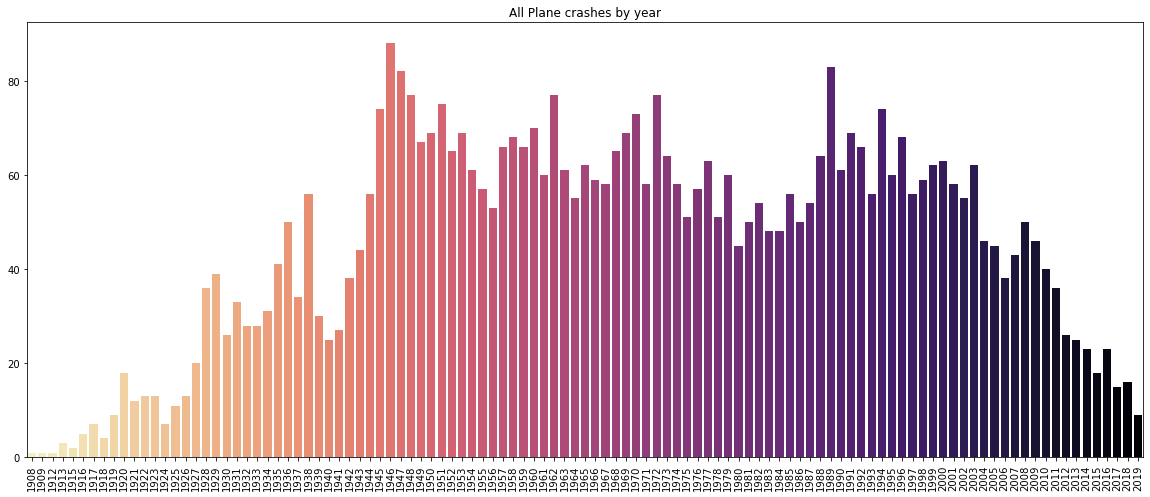

In [18]:
year=plane.Date.dt.year
## Set axes ##
years = year.value_counts()
## Create Bar Plot ##
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.title('All Plane crashes by year')

years_plot = sns.barplot(x=years.index,y=years.values,palette = "magma_r")

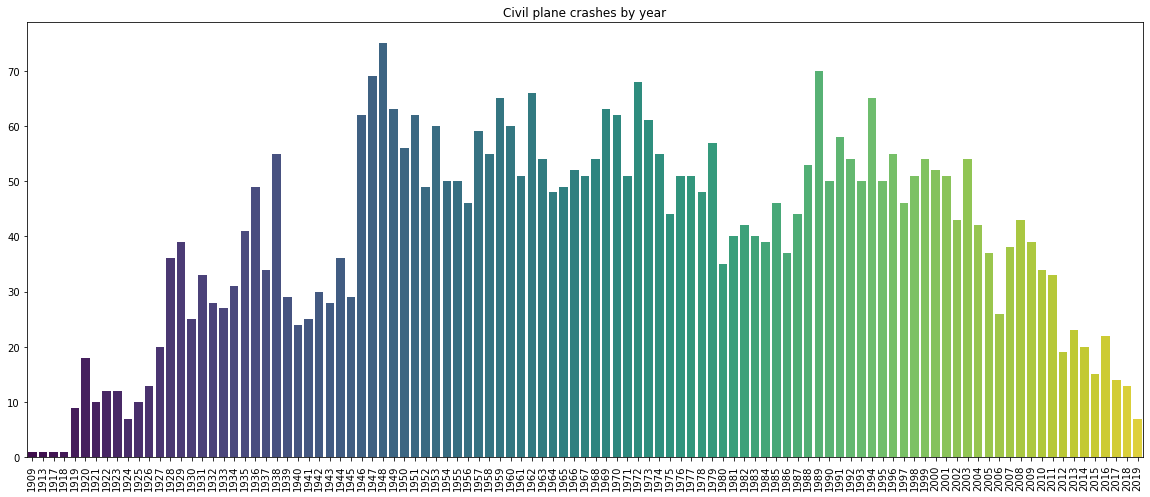

In [19]:
year=civil.Date.dt.year
## Set axes ##
years = year.value_counts()
## Create Bar Plot ##
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.title('Civil plane crashes by year')

years_plot = sns.barplot(x=years.index,y=years.values, palette = "viridis")

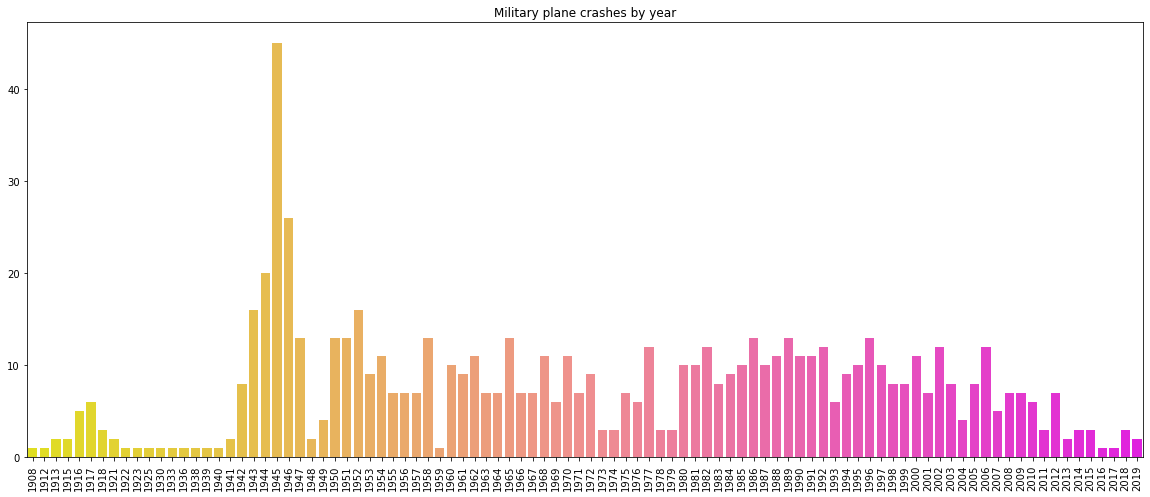

In [20]:
year=military.Date.dt.year
## Set axes ##
years = year.value_counts()
## Create Bar Plot ##
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.title('Military plane crashes by year')

years_plot = sns.barplot(x=years.index,y=years.values, palette = "spring_r")

#### <font color=darkgreen>**Observation_1:**</font> <font color=black>**We can clearly see that number of accidents are decreasing in both military and civil aircrafts.**</font> 

#### <font color=darkgreen>**Observation_2:**</font> <font color=black>**We all know that Military aircarft accidents are high between 1940 and 1945 because of World War-II.**</font> 

In [21]:
military.drop(["Location", "Operator"],inplace=True,axis=1)

In [22]:
military[["Military_country","Military_type"]]=plane["Sub division"].str.rsplit(" ",n=1,expand=True)

In [23]:
military.drop(["Sub division"],inplace=True,axis=1)

In [24]:
military["Military_country"].replace('-', '',regex=True,inplace=True)

In [25]:
military["Military_country"].replace(to_replace=r'(^\s[uU].*)',value='USA',regex=True,inplace=True)

In [26]:
military["Military_country"].replace(to_replace=r'(^\s)',value='',regex=True,inplace=True)

In [27]:
military["Country"].replace(to_replace='[()]',value='',regex=True,inplace=True)

In [28]:
military["Country"].replace(to_replace=r'(,)',value='',regex=True,inplace=True)

### <font color=darkblue>**Which country has highest number of Military accidents?**</font> 

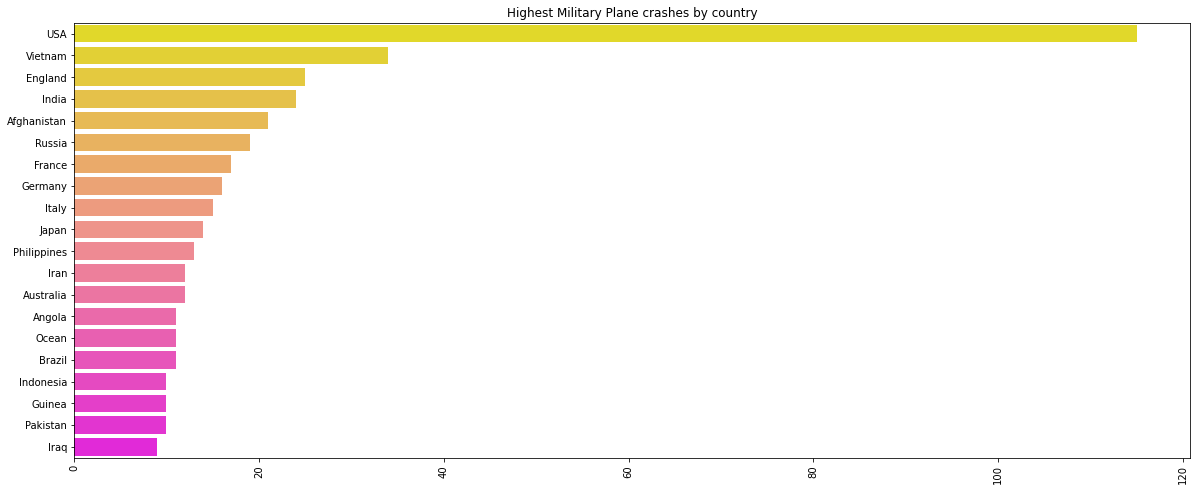

In [29]:
mac=military.Country.value_counts().nlargest(20)
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.title('Highest Military Plane crashes by country')

mac_plot = sns.barplot(y=mac.index,x=mac.values, palette = "spring_r")

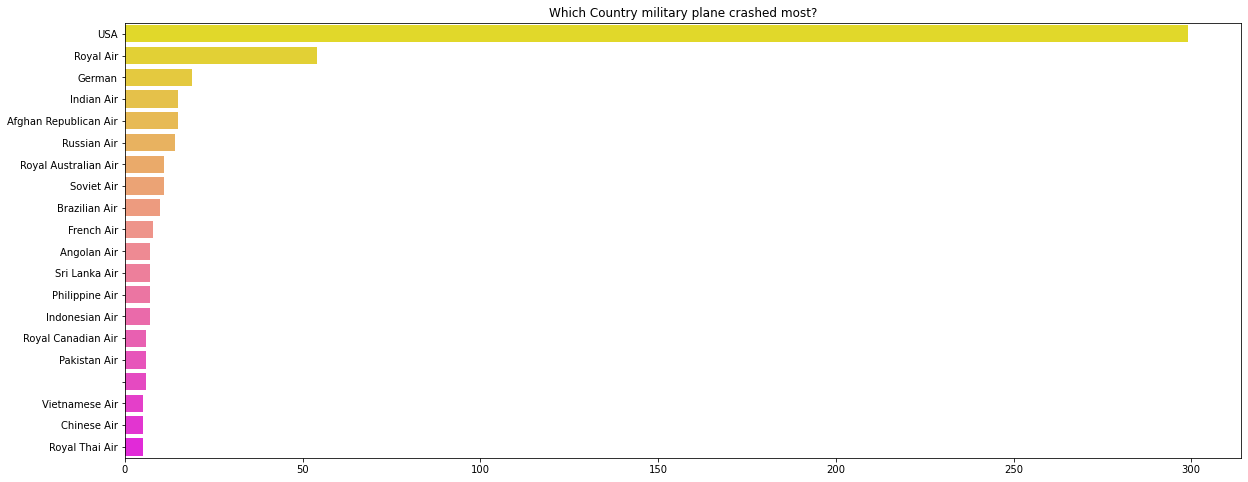

In [30]:
mcac=military.Military_country.value_counts().nlargest(20)
plt.figure(figsize=(20,8))
plt.title('Which Country military plane crashed most?')

mac_plot = sns.barplot(y=mcac.index,x=mcac.values, palette = "spring_r")

In [31]:
military.Route.fillna(value="Unknown", inplace=True)
military.Route.replace(to_replace="Military exercises",value='Military exercise',regex=True,inplace=True)
military.Route.replace(to_replace="Training exercise",value='Training',regex=True,inplace=True)

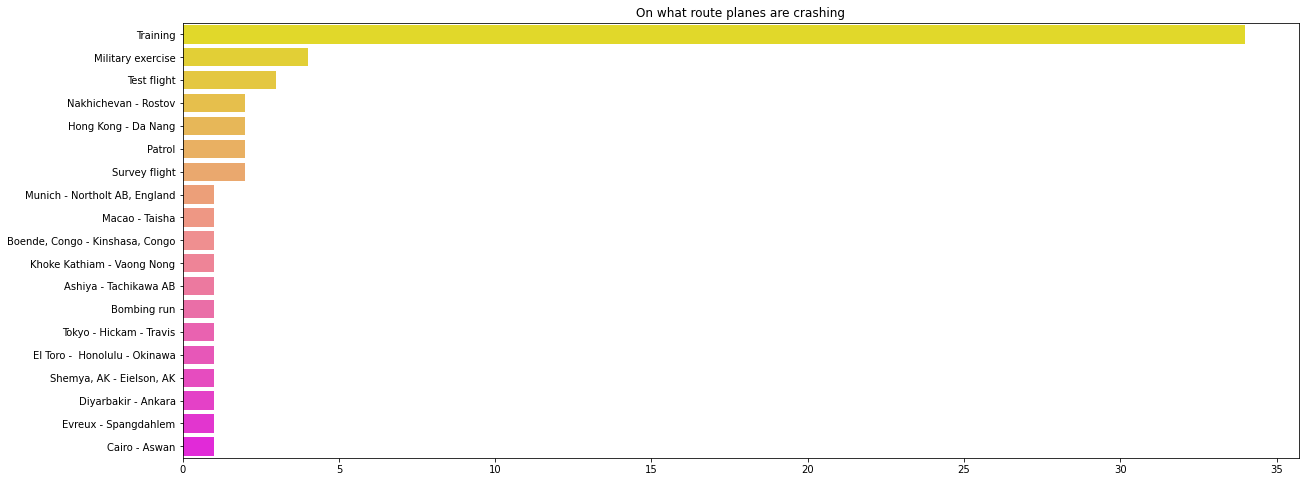

In [32]:
mr=military.Route.value_counts().nlargest(20)
years_index = mr.index  # x ticks
years_values = mr.values
plt.figure(figsize=(20,8))
plt.title('On what route planes are crashing')

mac_plot = sns.barplot(y=years_index[1:],x=years_values[1:], palette = "spring_r")

In [33]:
military.head()

,Date,Route,Aboard,Fatalities,Ground,Summary,City,Country,Make,Model_number,Civil/Military,Military_country,Military_type
0,1908-09-17,Demonstration,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Fort Myer,USA,Wright,Flyer III,Military,USA,Army
2,1912-07-12,Test flight,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Atlantic City New,USA,Dirigible,None,Military,USA,Navy
4,1913-09-09,Unknown,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Over the North,Sea,Zeppelin,L-1 (airship),Military,German,Navy
5,1913-10-17,Unknown,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Near Johannisthal,Germany,Zeppelin,L-2 (airship),Military,German,Navy
6,1915-03-05,Unknown,41.0,21.0,0.0,Crashed into trees while attempting to land af...,Tienen,Belgium,Zeppelin,L-8 (airship),Military,German,Navy


In [34]:
aircraft_countries = military.groupby('Country').Military_country.value_counts()
aircraft_countries = aircraft_countries.sort_values(ascending=False)

In [35]:
aircraft_countries

Country      Military_country     
USA          USA                      107
Vietnam      USA                       28
India        Indian Air                15
Afghanistan  Afghan Republican Air     12
England      Royal Air                 11
                                     ... 
Iraq         Royal Air                  1
                                        1
Russia       USA                        1
Iran         USA                        1
coast         (2) U.S. Army Air         1
Name: Military_country, Length: 305, dtype: int64